In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras import metrics
from sklearn.metrics._plot.confusion_matrix import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score


## **Introduction** ⌨
This credit risk dataset has two stages:

**1.** An unsupervised learning analysis, which aims to create clusters to understand the type of customers the bank has.

**2.** Neural network models to determine whether or not a customer is eligible for credit (classification).


## **Data cleaning and exploration** 📑

In [ ]:
df= pd.read_csv('/content/loan_cluster_df.csv')
df.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,3635824,56,8,0,0,0,8,13,1
1,3231341,47,6,1,0,0,6,14,0
2,7430695,59,8,0,0,0,8,10,0
3,8688710,47,1,0,0,0,1,10,0
4,2229190,21,11,0,0,0,9,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             19438 non-null  int64
 1   Age                19438 non-null  int64
 2   Experience         19438 non-null  int64
 3   Married            19438 non-null  int64
 4   Owns_House         19438 non-null  int64
 5   Owns_Car           19438 non-null  int64
 6   CURRENT_JOB_YRS    19438 non-null  int64
 7   CURRENT_HOUSE_YRS  19438 non-null  int64
 8   Risk_Flag          19438 non-null  int64
dtypes: int64(9)
memory usage: 1.3 MB


In [ ]:
df.duplicated().sum() #Duplicate identification

10463

In [ ]:
df = df.drop_duplicates() # Duplicates are eliminated, since they can introduce bias in the training data, affecting the model performance.

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.isna().sum() # The number of null values is checked, where no null values are found.

Income               0
Age                  0
Experience           0
Married              0
Owns_House           0
Owns_Car             0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df["Income"].unique() # No inconsistencies found

array([3635824, 3231341, 7430695, ..., 9152027,  221192, 9608615])

In [ ]:
df["Age"].unique() # No inconsistencies found

array([56, 47, 59, 21, 31, 64, 51, 45, 34, 73, 42, 67, 25, 72, 49, 60, 55,
       71, 27, 63, 68, 69, 24, 77, 40, 46, 62, 53, 52, 75, 57, 58, 78, 65,
       38, 61, 26, 30, 41, 37, 22, 54, 76, 50, 36, 79, 66, 35, 29, 33, 70,
       48, 32, 28, 74, 39, 44, 23, 43])

In [ ]:
df["Experience"].unique() # No inconsistencies found

array([ 8,  6,  1, 11,  3, 15,  2,  7, 18, 13, 14, 10, 20, 19, 17,  0, 16,
        5, 12,  4,  9])

In [ ]:
df["Married"].value_counts() # No inconsistencies found

0    8058
1     917
Name: Married, dtype: int64

In [ ]:
df["Owns_House"].value_counts() # No inconsistencies found

0    8492
1     483
Name: Owns_House, dtype: int64

In [ ]:
df["Owns_Car"].value_counts() # No inconsistencies found

0    6268
1    2707
Name: Owns_Car, dtype: int64

In [ ]:
df["CURRENT_JOB_YRS"].unique() # No inconsistencies found

array([ 8,  6,  1,  9,  3, 11,  2,  7, 10, 14,  5, 12,  0,  4, 13])

In [ ]:
df["CURRENT_HOUSE_YRS"].value_counts() # No inconsistencies found

11    1862
13    1801
12    1791
14    1786
10    1735
Name: CURRENT_HOUSE_YRS, dtype: int64

In [ ]:
df["Risk_Flag"].value_counts() # No inconsistencies found

0    7481
1    1494
Name: Risk_Flag, dtype: int64

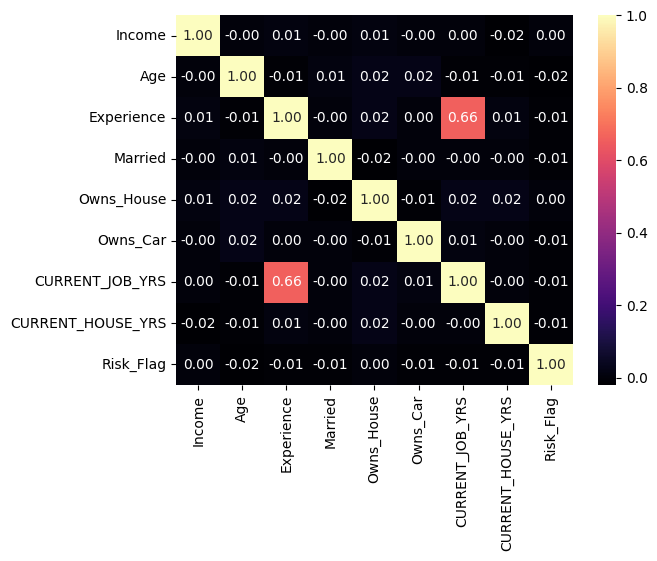

In [ ]:
corr_matrix = df.corr()
rounded_corr_matrix = np.round(corr_matrix, decimals=2)
sns.heatmap(rounded_corr_matrix, annot=True, cmap="magma", fmt=".2f")
plt.show()
#I DID THIS HEAT MAP IN ORDER TO SEE IF SIGNIFICANT RELATIONSHIPS EXIST BETWEEN RISK_Flag AND THE OTHER CHARACTERISTICS OF THE DATA, HOWEVER NO SIGNIFICANT RELATIONSHIPS ARE FOUND.

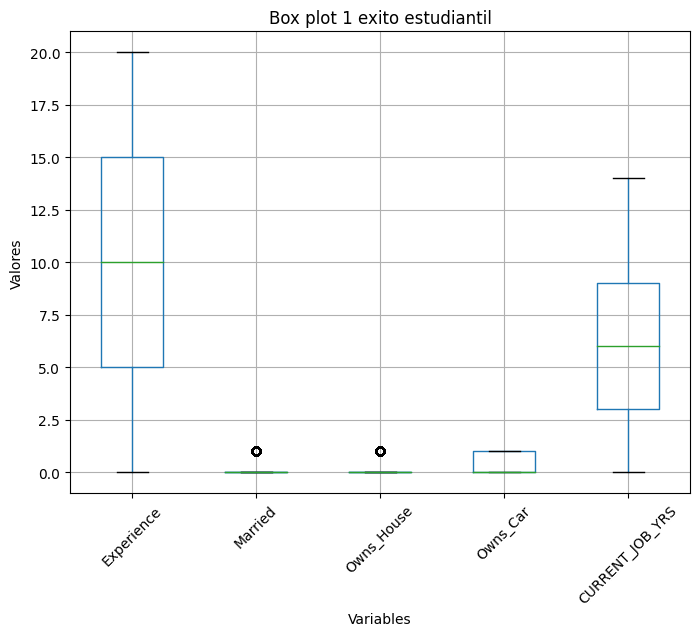

In [ ]:
variables = [ "Experience", "Married", "Owns_House", "Owns_Car", "CURRENT_JOB_YRS"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Box plot 1 ")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

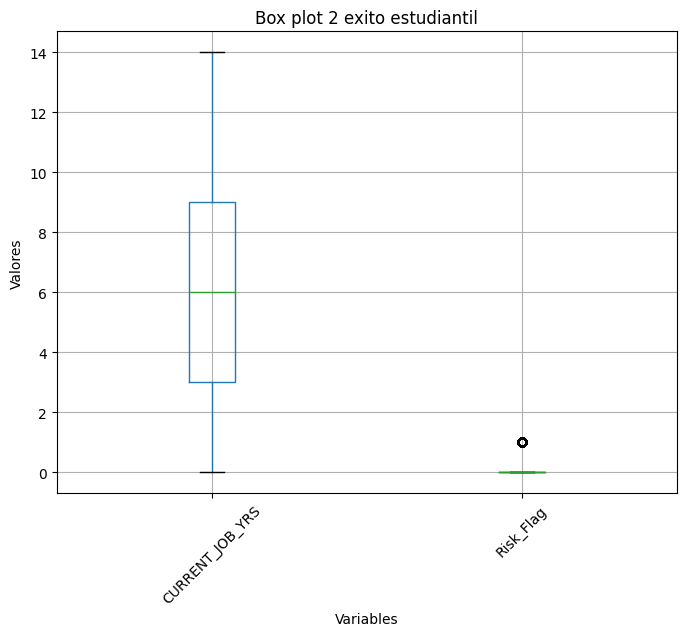

In [ ]:
variables = ["CURRENT_JOB_YRS", "Risk_Flag"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Box plot 2")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

### **Unsupervised learning analysis** 🖥

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,-0.478067,0.352576,-0.339390,-0.337342,-0.238489,-0.657173,0.459363,0.707894,2.237714
1,-0.618354,-0.177686,-0.672580,2.964346,-0.238489,-0.657173,-0.090122,1.419038,-0.446885
2,0.838106,0.529329,-0.339390,-0.337342,-0.238489,-0.657173,0.459363,-1.425535,-0.446885
3,1.274422,-0.177686,-1.505556,-0.337342,-0.238489,-0.657173,-1.463834,-1.425535,-0.446885
4,-0.965929,-1.709553,0.160395,-0.337342,-0.238489,-0.657173,0.734106,-0.714392,-0.446885


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

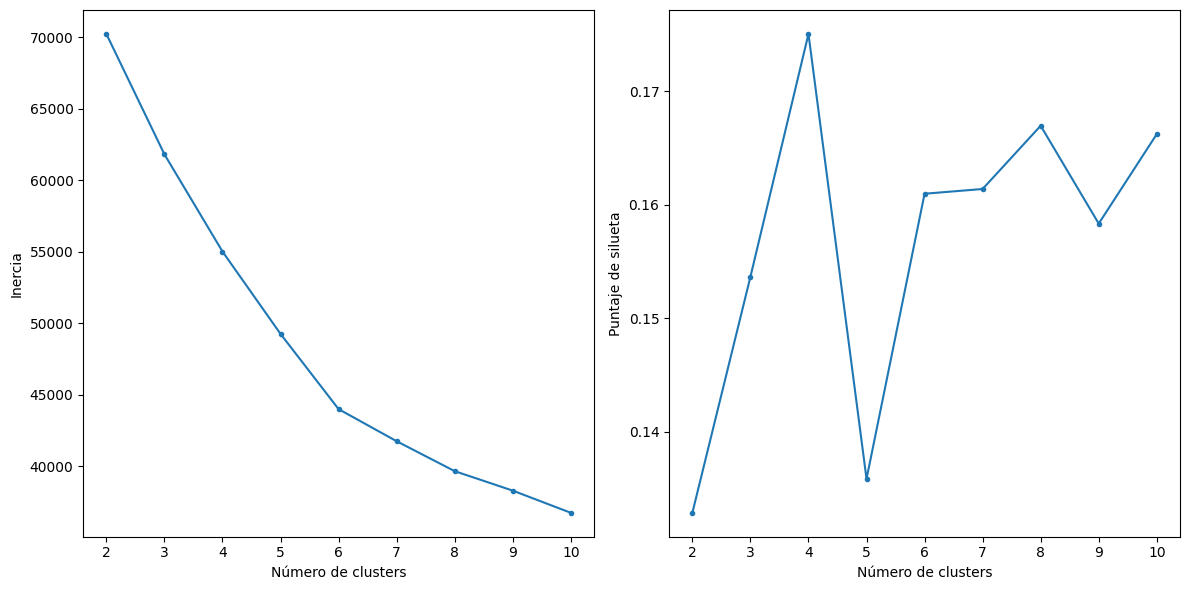

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
axes[0].plot(range(2,11), inertias, marker = '.')
axes[0].set_xlabel('Número de clusters')
axes[0].set_ylabel('Inercia')

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
axes[1].plot(range(2, 11), silhouette_scores, marker = '.')
axes[1].set_xlabel('Número de clusters')
axes[1].set_ylabel('Puntaje de silueta')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
silhouette_score(X_scaled, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-0.00028297203920473276

#### From the elbow and silhouette plots I have been able to determine that the best number of clusters for this problem is 4, because although in the elbow plot it seems that the best option is 6, in the silhouette score plot it shows a higher score for n=4 and for n=6 it is significantly lower, so it was decided to use 4 clusters.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_
df.head()
#Averages were obtained for each characteristic in each of the previously defined clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,cluster
0,3635824,56,8,0,0,0,8,13,1,1
1,3231341,47,6,1,0,0,6,14,0,2
2,7430695,59,8,0,0,0,8,10,0,2
3,8688710,47,1,0,0,0,1,10,0,2
4,2229190,21,11,0,0,0,9,11,0,2


In [ ]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0,4.953070e+06,50.266735,10.036045,0.101957,0.052523,0.326468,6.237899,12.057673,0.168898
1,1,5.046205e+06,49.841183,9.991238,0.115005,0.043812,0.282585,6.208105,12.024096,0.169770
2,2,5.021547e+06,49.986571,10.025813,0.099970,0.054760,0.299910,6.349000,11.997911,0.165921
3,3,4.965489e+06,50.303342,10.344473,0.110540,0.064267,0.313625,6.473008,11.940874,0.161954


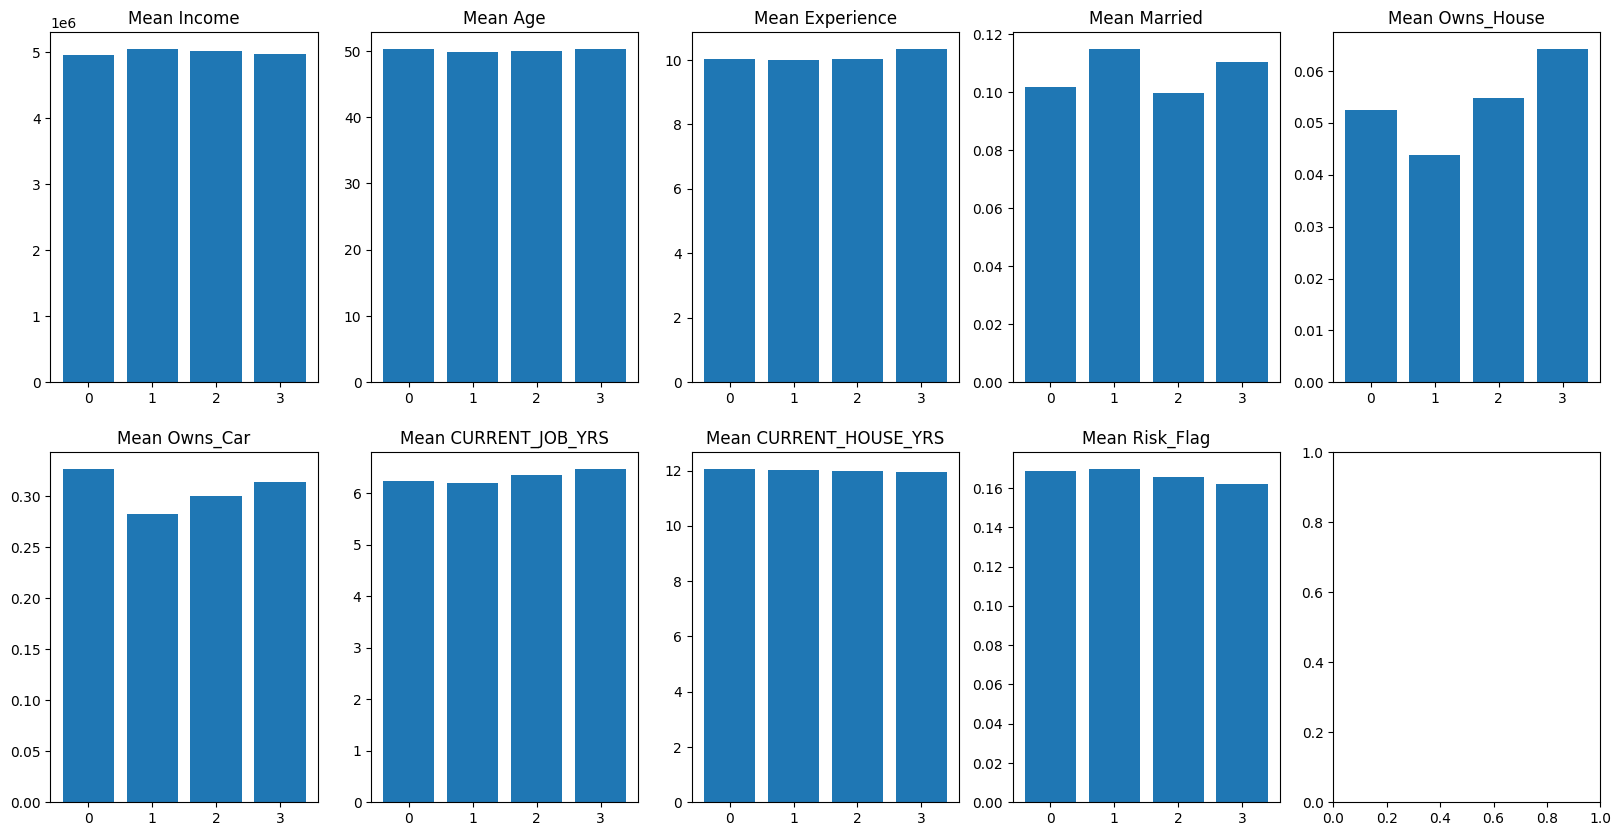

In [ ]:

fig, axes = plt.subplots(2,5, figsize = (20, 10))
axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## **Segmentation analysis** 🔍
#### **Cluster 0:**
Cluster 0 has a higher average for the characteristic own car compared to the other clusters. It is also observed that for the characteristic own house it has a lower average compared to clusters 2 and 3, but it is higher compared to cluster 1. As for the characteristics Income, Age and current_house_yrs no significant characteristics are observed. As for Risk_flag the lowest average 3 is obtained compared to the other clusters.

#### **Cluster 1:**
Cluster 1 has the highest average in the Married characteristic compared to the other clusters. It is also observed that for this cluster the lowest averages were obtained for the Owns_house and Owns_car characteristics.
Risk_flag has the highest average compared to the other clusters. Although the difference is very small, this cluster has the highest credit risk.

#### **Cluster 2:**
Cluster 2 has the lowest average compared to the other clusters.
Cluster 2 has the lowest average in the characteristic Married, in turn it is observed that it has a higher average for Owns_house compared to it in the characteristic Married 0 and 1, but it is lower compared to cluster 3. As for Owns_car it has a higher average compared to cluster 1, but a lower average compared to cluster 0 and 3. Finally for Risk_flag it has the second lowest average compared to the other clusters.   


#### **Cluster 3:**
As for cluster 3 it has the highest average for Experience, Owns_house and Current_job_yrs. For the characteristic Married this cluster has the second highest average, the first belongs to cluster 1. Finally for Risk_flag it has the lowest average compared to the other clusters. Therefore, this cluster has the lowest credit risk.


From this it is important to take into account that probably characteristics such as Experience, Owns_hous and Current_job_yrs influence the fact that a client presents more or less credit risk, from this segmentation and the understanding of the influence of each of the characteristics, measures can be taken to create recommendations or strategies that allow the Indian bank to make decisions about the loans requested by its clients.


# **Neural networks** 📔

In [ ]:
df1= pd.read_csv('/content/loan_model_df.csv')
df1.head()

,Income,Age,Experience,Married,Owns_House,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,3635824,56,8,0,0,0,8,13,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3231341,47,6,1,0,0,6,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7430695,59,8,0,0,0,8,10,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8688710,47,1,0,0,0,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2229190,21,11,0,0,0,9,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19438 entries, 0 to 19437
Columns: 406 entries, Income to STATE_West_Bengal
dtypes: int64(406)
memory usage: 60.2 MB


In [ ]:
df1.shape

(19438, 406)

In [ ]:
df1.duplicated().sum() #Duplicate identification

10463

In [ ]:
df1 = df1.drop_duplicates() #Deletion of duplicates

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.isna().sum() # The number of null values is checked, where no null values are found.

Income                    0
Age                       0
Experience                0
Married                   0
Owns_House                0
                         ..
STATE_Tripura             0
STATE_Uttar_Pradesh       0
STATE_Uttar_Pradesh[5]    0
STATE_Uttarakhand         0
STATE_West_Bengal         0
Length: 406, dtype: int64

In [ ]:
df1['Risk_Flag'].value_counts()

0    7481
1    1494
Name: Risk_Flag, dtype: int64

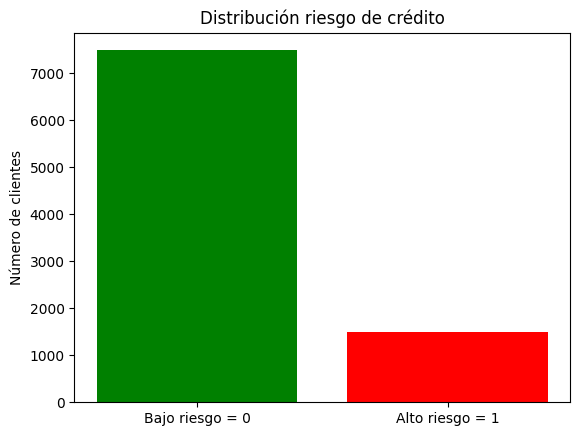

In [ ]:
counts = df1['Risk_Flag'].value_counts()
fig, ax = plt.subplots()
ax.bar(['Bajo riesgo = 0', 'Alto riesgo = 1'], counts, color=['green', 'red'])
ax.set_ylabel('Número de clientes')
ax.set_title('Distribución riesgo de crédito')
plt.show()
# This graph shows that the data in the target (Risk_Flag) are unbalanced, so it is advisable to take into account other metrics in addition to accuracy, since this is not the most appropriate to determine the quality of a model in these situations.

In [ ]:
X = df1.drop('Risk_Flag', axis=1)
y = df1['Risk_Flag']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
sm = SMOTE(random_state = 0)
X_resem , y_resem = sm.fit_resample(X_scaled, y)
# https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
y_resem.value_counts()

1    7481
0    7481
Name: Risk_Flag, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resem, y_resem, test_size = 0.2, random_state = 42)

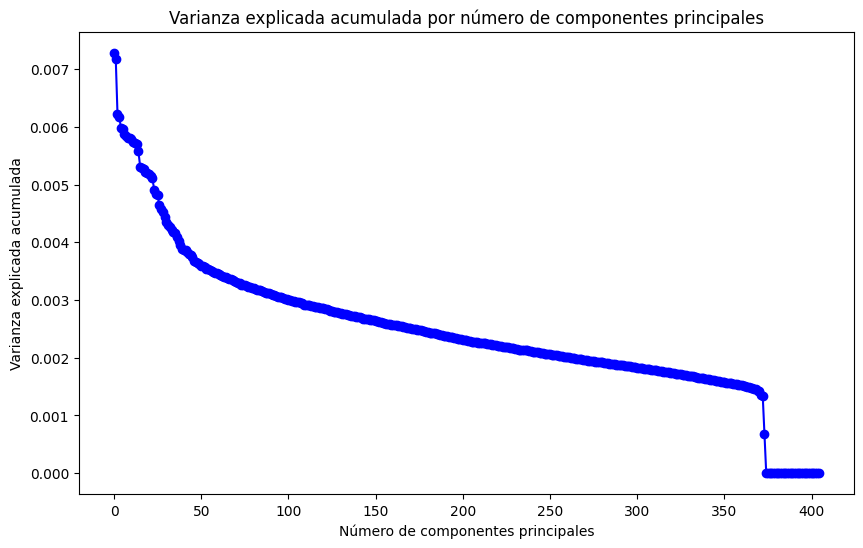

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_,'bo-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.show()

In [ ]:
pca2 = PCA(n_components=0.98)
X_train_pca2 = pca2.fit_transform(X_train)

print("El número de componentes es", pca2.n_components_, "de", pca.n_features_)

El número de componentes es 360 de 405


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_pca2 = pca2.fit_transform(X_train)

In [ ]:
X_test_pca2 = pca2.transform(X_test)
X_test_pca2.shape

(2993, 360)

In [ ]:
input_shape = X_train_pca2.shape[1]
input_shape

360

### In the first instance I obtained a graph of accumulated variance explained for all 405 columns to be able to observe which was the best point to choose the number of components, the point where it stabilized (I visualized this point between 350 and 400). Finally, a good percentage of variance explained (0.98) was maintained, resulting in 360 columns out of 405.

# **Model** **1**

In [ ]:
model = Sequential()
model.add(Dense(360, input_dim=input_shape, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
history = model.fit(X_train_pca2, y_train, validation_data=(X_test_pca2, y_test), epochs=80)


Epoch 1/80
375/375 [==============================] - 5s 8ms/step - loss: 0.6589 - accuracy: 0.6201 - precision: 0.6202 - recall: 0.6120 - val_loss: 0.6118 - val_accuracy: 0.6716 - val_precision: 0.7195 - val_recall: 0.5789
Epoch 2/80
375/375 [==============================] - 3s 8ms/step - loss: 0.5241 - accuracy: 0.7446 - precision: 0.7420 - recall: 0.7469 - val_loss: 0.5034 - val_accuracy: 0.7655 - val_precision: 0.7605 - val_recall: 0.7855
Epoch 3/80
375/375 [==============================] - 2s 5ms/step - loss: 0.3958 - accuracy: 0.8337 - precision: 0.8296 - recall: 0.8381 - val_loss: 0.4435 - val_accuracy: 0.8109 - val_precision: 0.8176 - val_recall: 0.8079
Epoch 4/80
375/375 [==============================] - 2s 6ms/step - loss: 0.3117 - accuracy: 0.8741 - precision: 0.8666 - recall: 0.8831 - val_loss: 0.4400 - val_accuracy: 0.8259 - val_precision: 0.8275 - val_recall: 0.8303
Epoch 5/80
375/375 [==============================] - 3s 7ms/step - loss: 0.2683 - accuracy: 0.8950 - pr

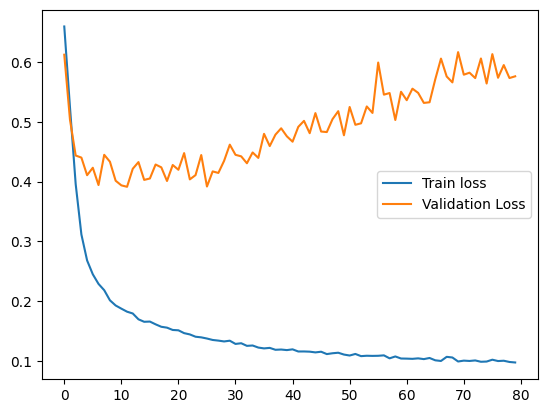

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();


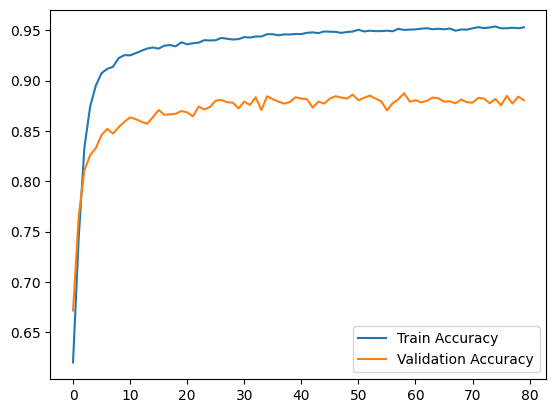

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [ ]:
loss, acc, precision, recall = model.evaluate(X_test_pca2, y_test, batch_size=32)
print("Loss", loss)
print ("Accuracy", acc)
print("Precision", precision)
print ("Recall", recall)

94/94 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.8804 - precision: 0.8538 - recall: 0.9224
Loss 0.5757442116737366
Accuracy 0.880387544631958
Precision 0.8538367748260498
Recall 0.9223684072494507


In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score
# ACCORDING TO THE TENSORFLOW METRICS GUIDE THIS IS HOW TO FIND F1-SCORE AN IMPORTANT METRIC TO DETERMINE HOW GOOD A MODEL THAT HAS UNBALANCED DATA IS https://www.tensorflow.org/api_docs/python/tf/keras/metrics/F1Score.

0.8867805071112953

94/94 [==============================] - 0s 2ms/step


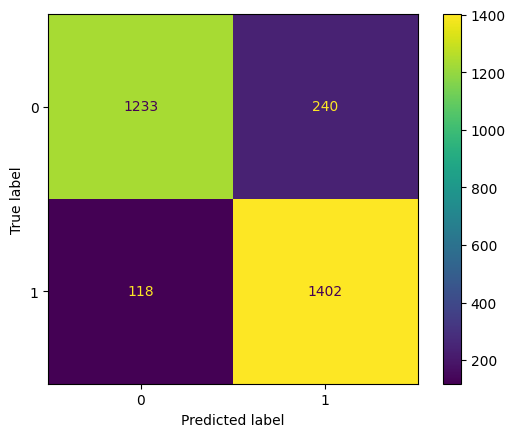

In [ ]:
y_pred = model.predict(X_test_pca2)
y_pred_classes = np.round(y_pred)

cm=confusion_matrix(y_test, y_pred_classes);
disp = ConfusionMatrixDisplay(confusion_matrix=cm);
disp.plot();
## There are 1233 true negatives, 1402 true positives, 118 false negatives and 240 false positives.

#### **In this first model it is observed:**

**Loss:** A loss of 0.5 is obtained for this model.

**Loss:** 0.5 loss is obtained for this model.

**Accuracy:** 85% accuracy is obtained for this model.

**Recall:** 92% of Recall is obtained for this model.

**F1-score:** 88% F1-score is obtained for this model.

**Accuracy:** 88% accuracy is obtained for this model.

**-** As for the layers, ReLU activation function was used in order to introduce non-linearity in the model, which allows the extraction of complex characteristics.

**-** The last layer uses a sigmoid function, since this problem is focused on binary classification.

**-** The loss function binary_crossentropy was used, which is suitable for this binary classification problem.

This model obtained in general good metrics in the test, the F1-Score that allows to see the average of precision and recall was of 88%, since being unbalanced the data we cannot trust the accuracy, later regularizations will be made with the purpose of observing if the performance of the model can be improved.


# **Model** **2**

In [ ]:
from tensorflow.keras.regularizers import l2
model1 = Sequential()
model1.add(Dense(360, input_dim=input_shape, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(200, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
history1 = model1.fit(X_train_pca2, y_train, validation_data=(X_test_pca2, y_test), epochs=80)

Epoch 1/80
375/375 [==============================] - 8s 17ms/step - loss: 1.8945 - accuracy: 0.5903 - precision_1: 0.5869 - recall_1: 0.5986 - val_loss: 0.7205 - val_accuracy: 0.5984 - val_precision_1: 0.5881 - val_recall_1: 0.6980
Epoch 2/80
375/375 [==============================] - 3s 8ms/step - loss: 0.7022 - accuracy: 0.6189 - precision_1: 0.6030 - recall_1: 0.6875 - val_loss: 0.6915 - val_accuracy: 0.6131 - val_precision_1: 0.5937 - val_recall_1: 0.7546
Epoch 3/80
375/375 [==============================] - 2s 6ms/step - loss: 0.6858 - accuracy: 0.6416 - precision_1: 0.6241 - recall_1: 0.7047 - val_loss: 0.6857 - val_accuracy: 0.6505 - val_precision_1: 0.6555 - val_recall_1: 0.6572
Epoch 4/80
375/375 [==============================] - 3s 7ms/step - loss: 0.6708 - accuracy: 0.6716 - precision_1: 0.6526 - recall_1: 0.7282 - val_loss: 0.6731 - val_accuracy: 0.6816 - val_precision_1: 0.6728 - val_recall_1: 0.7263
Epoch 5/80
375/375 [==============================] - 5s 13ms/step - lo

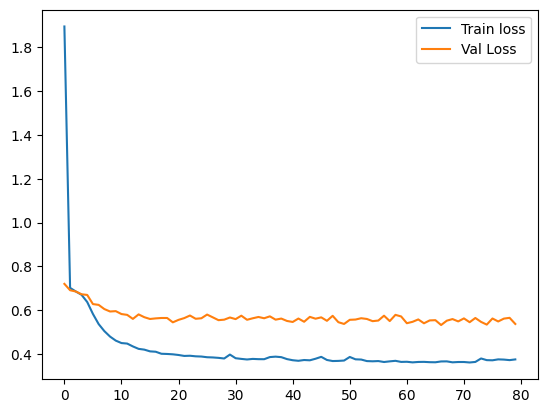

In [ ]:
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.legend();

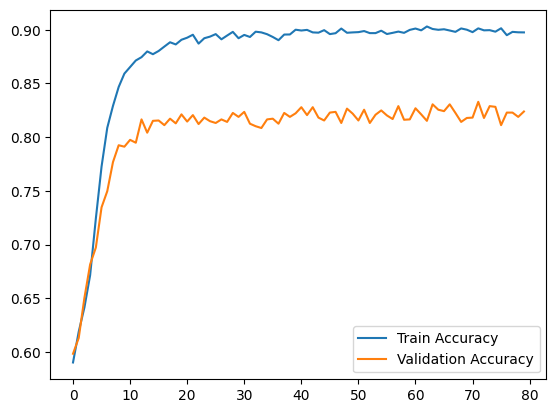

In [ ]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [ ]:
loss1, acc1, precision1, recall1 = model1.evaluate(X_test_pca2, y_test, batch_size=32)
print("Loss", loss1)
print ("Accuracy", acc1)
print("Precision", precision1)
print ("Recall", recall1)

94/94 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.8239 - precision_1: 0.8082 - recall_1: 0.8566
Loss 0.5377140045166016
Accuracy 0.8239225149154663
Precision 0.8081936836242676
Recall 0.8565789461135864


In [ ]:
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
f1_score1

0.8316831757181683

94/94 [==============================] - 0s 3ms/step


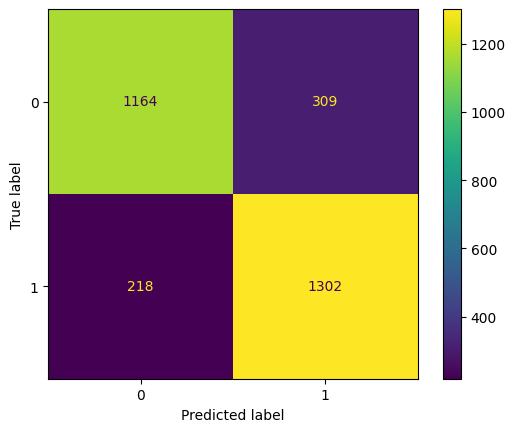

In [ ]:
y_pred1 = model1.predict(X_test_pca2)
y_pred_classes1 = np.round(y_pred1)

cm1=confusion_matrix(y_test, y_pred_classes1);
disp = ConfusionMatrixDisplay(confusion_matrix=cm1);
disp.plot();
# There are 1164 true negatives, 1302 true positives, 218 false negatives and 309 false positives.

#### **In this second model it is observed:**

**Loss:** A loss of 0.5 is obtained for this model.

**Loss:** 0.5 loss is obtained for this model.

**Accuracy:** 80% accuracy is obtained for this model.

**Recall:** 85% of Recall is obtained for this model.

**F1-score:** 83% F1-score is obtained for this model.

**Accuracy:** 82% accuracy is obtained for this model.

**-** As for the layers, the same ReLU activation function was used in order to introduce nonlinearity in the model.

**-** A hidden layer was added in order to improve the learning capability.

**-** An L2 regularization was applied, in order to check if the model performance could be improved.

This model obtained in general good metrics in the test, we observed an improvement in the loss function between train and test compared to the first model (see graph). However, the accuracy and F1-score metrics did not improve. It is also seen in the confusion matrix that there was no improvement.


# **Model** **3**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model2 = Sequential()
# Primera capa oculta
model2.add(Dense(360, input_dim=input_shape, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
early_stopping = EarlyStopping(patience = 5)
history2 = model2.fit(X_train_pca2, y_train, validation_data=(X_test_pca2, y_test), epochs=80, callbacks = [early_stopping])

Epoch 1/80
375/375 [==============================] - 6s 12ms/step - loss: 0.6583 - accuracy: 0.6070 - precision_2: 0.6085 - recall_2: 0.5915 - val_loss: 0.6422 - val_accuracy: 0.6331 - val_precision_2: 0.6124 - val_recall_2: 0.7566
Epoch 2/80
375/375 [==============================] - 3s 7ms/step - loss: 0.5854 - accuracy: 0.6901 - precision_2: 0.6845 - recall_2: 0.7009 - val_loss: 0.5945 - val_accuracy: 0.6930 - val_precision_2: 0.7124 - val_recall_2: 0.6632
Epoch 3/80
375/375 [==============================] - 4s 10ms/step - loss: 0.4668 - accuracy: 0.7858 - precision_2: 0.7835 - recall_2: 0.7875 - val_loss: 0.4945 - val_accuracy: 0.7778 - val_precision_2: 0.7680 - val_recall_2: 0.8059
Epoch 4/80
375/375 [==============================] - 4s 9ms/step - loss: 0.3552 - accuracy: 0.8524 - precision_2: 0.8450 - recall_2: 0.8616 - val_loss: 0.4547 - val_accuracy: 0.8179 - val_precision_2: 0.8007 - val_recall_2: 0.8539
Epoch 5/80
375/375 [==============================] - 3s 7ms/step - lo

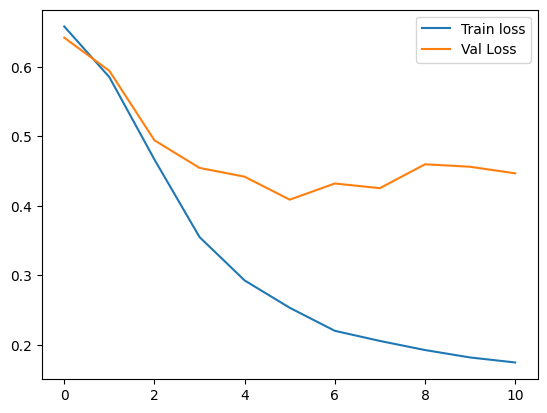

In [ ]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.legend();

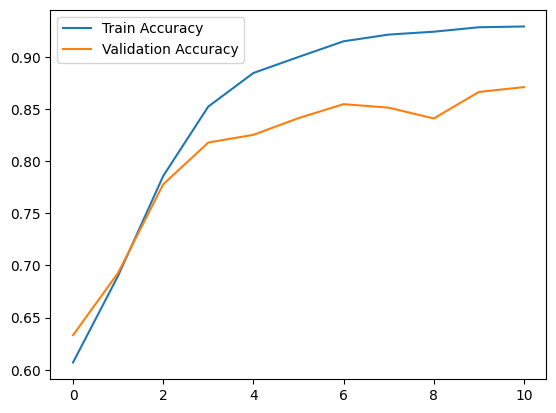

In [ ]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [ ]:
loss2, acc2, precision2, recall2 = model2.evaluate(X_test_pca2, y_test, batch_size=32)
print("Loss", loss2)
print ("Accuracy", acc2)
print("Precision", precision2)
print ("Recall", recall2)

94/94 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8710 - precision_2: 0.8351 - recall_2: 0.9296
Loss 0.4469136893749237
Accuracy 0.8710324168205261
Precision 0.835106372833252
Recall 0.92960524559021


In [ ]:
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
f1_score2

0.879825640299398

94/94 [==============================] - 0s 2ms/step


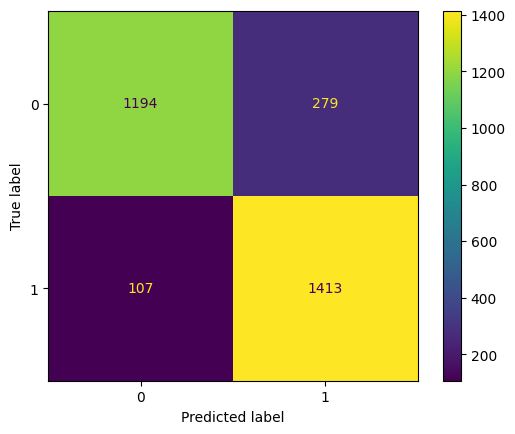

In [ ]:
y_pred2 = model2.predict(X_test_pca2)
y_pred_classes2 = np.round(y_pred2)

cm2=confusion_matrix(y_test, y_pred_classes2);
disp = ConfusionMatrixDisplay(confusion_matrix=cm2);
disp.plot();
# There are 1194 true negatives, 1413 true positives, 107 false negatives and 279 false positives.

#### **In this third model it is observed:**

**Loss:** ** A 0.4 loss is obtained for this model.

**Loss:** 0.4 loss is obtained for this model.

**Accuracy:** 83% accuracy is obtained for this model.

**Recall:** 92% Recall is obtained for this model.

**F1-score:** 87% F1-score is obtained for this model.

**Accuracy:** 87% accuracy is obtained for this model.

**-** As for the layers, the same ReLU activation function was used in order to introduce nonlinearity in the model.

**-** A hidden layer was added in order to improve the learning capability and increase the performance of the model.

**-** An Early stop regularization was applied in order to improve the model, since it prevents over-fitting of the data and improves the model performance by stopping the training before the data is over-fitted.

This model obtained in general good metrics in the test, an improvement in Loss and in the identification of true positives is observed.



### **CONCLUSION** ✍

According to the confusion matrices and the results of the metrics of each model, **the** **Model** **1** and **the** **Model** **3** are good choices since they obtained good metrics, however in this case I decide to choose **the** **Model** **3** for the following reasons:

- It has the highest number of true positives (1413) and the lowest number of false negatives (107), which is important in a credit risk problem that seeks to minimize false negatives and correctly identify customers who are high risk (true positives), as this reduces the risk of the bank lending money to customers who cannot meet their commitment.

- In terms of the metrics obtained, model 3 obtained the best results, since in the loss function the value was 0.4, the lowest of all the models, in terms of F1-Score, which gives us an average of the accuracy and the Recall was the second highest (87%), the highest F1-score was that of model 1 (88%), so the difference is minimal.

This model is a good option for the commercial interests of the Indian bank, as it can correctly classify with a high percentage whether a client is eligible or not to acquire a loan.






# **Difference in model performance (SMOTE)** 📈

# Model 1 without SMOTE

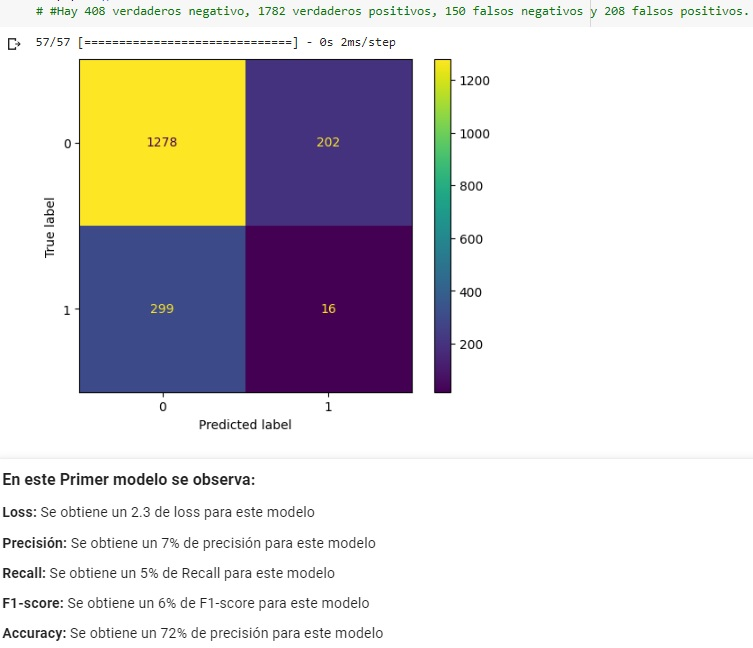

# Model 1 with SMOTE

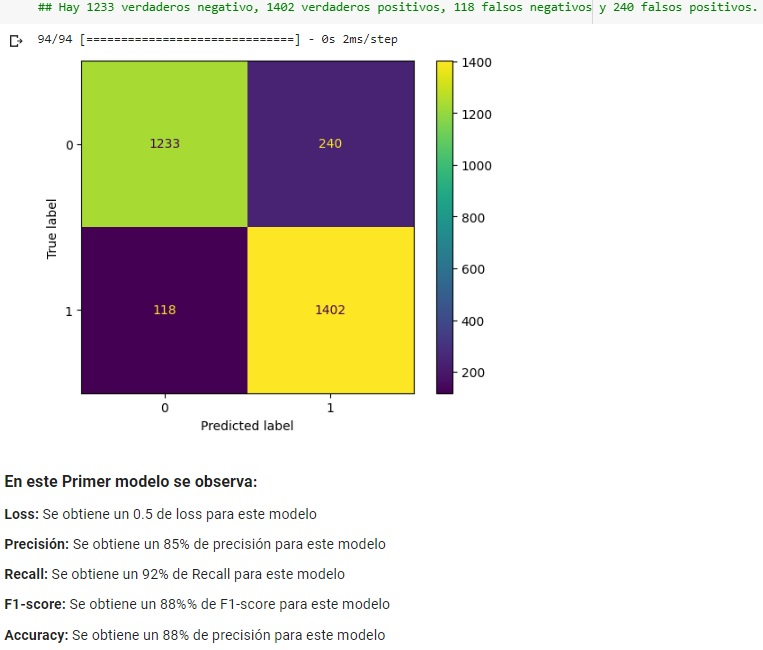

## SMOTE analysis

Using the SMOTE technique (Synthetic Minority Over-sampling Technique), turned out in this case to be an excellent approach to address the imbalance present in the dataset, this technique uses oversampling, which consists of duplicating examples of the minority class (synthesizing new examples from existing examples), with the advantage that these do not add any new information.

As we can see in the images, initially I made a model without SMOTE, where the metrics were really bad, by integrating SMOTE I could increase the performance of the model, which is observed in the significant improvement of the metrics.
